In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
file_path = '/content/sample_data/adult.data'

In [64]:
df = pd.read_csv(file_path, sep=',')
df.columns = ['age', 'type_employer', 'fnlwgt', 'education',
                "education_num","marital", "occupation", "relationship", "race","sex",
                "capital_gain", "capital_loss", "hr_per_week","country","income"]

In [65]:
df.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [66]:
count = df.groupby('country').size()
count

country
 ?                               583
 Cambodia                         19
 Canada                          121
 China                            75
 Columbia                         59
 Cuba                             95
 Dominican-Republic               70
 Ecuador                          28
 El-Salvador                     106
 England                          90
 France                           29
 Germany                         137
 Greece                           29
 Guatemala                        64
 Haiti                            44
 Holand-Netherlands                1
 Honduras                         13
 Hong                             20
 Hungary                          13
 India                           100
 Iran                             43
 Ireland                          24
 Italy                            73
 Jamaica                          81
 Japan                            62
 Laos                             18
 Mexico                       

In [67]:
count = df.groupby('age').size()
count

age
17    395
18    550
19    712
20    753
21    720
     ... 
85      3
86      1
87      1
88      3
90     43
Length: 73, dtype: int64

In [87]:
df['age'].describe()

count    32560.000000
mean        38.581634
std         13.640642
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [69]:
Q1 = np.percentile(df['age'], 25)
Q3 = np.percentile(df['age'], 75)
IQR = Q3-Q1

In [77]:
Q1

28.0

In [78]:
Q3

48.0

In [86]:


data = df['age']


Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

k = 1.5

upper_bound = Q3 + k * IQR
lower_bound = Q1 - k * IQR

print("Upper Bound:", upper_bound)
print("Lower Bound:", lower_bound)


Upper Bound: 78.0
Lower Bound: -2.0


In [73]:
median_age = df['age'].median()

In [74]:
print(median_age)

37.0


In [93]:
#replacing the outliers
df['age'] = np.where(df['age'] > 58, median_age, df['age'])
df['age'] = np.where(df['age'] < 16, median_age, df['age'])

In [94]:
df['age'].describe()

count    32560.000000
mean        35.955375
std         10.435759
min         17.000000
25%         28.000000
50%         37.000000
75%         43.000000
max         58.000000
Name: age, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f55a512acb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f55a512bbe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f55a512b0a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f55a53943d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f55a53949a0>],
 'means': []}

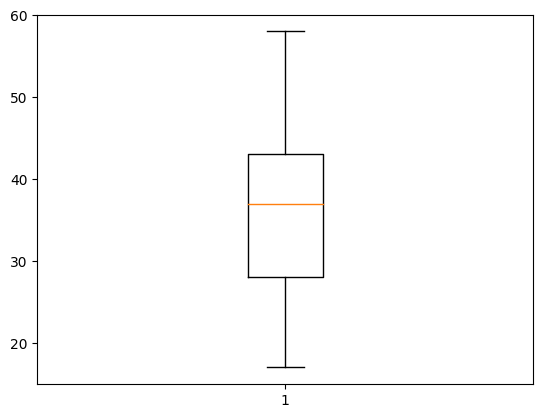

In [95]:
plt.boxplot(df['age'])

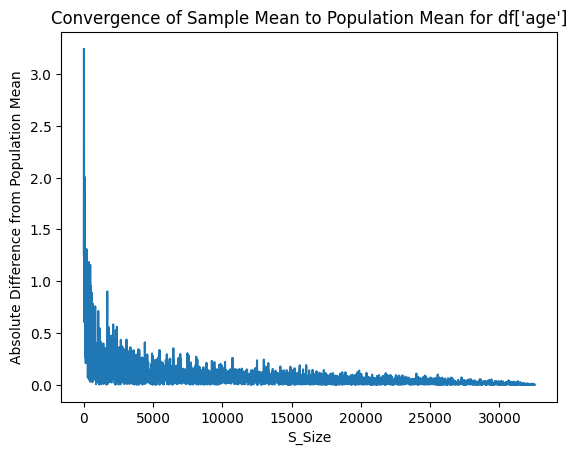

In [96]:

population = df["age"].to_numpy()

sample_sizes = range(10, len(population), 10)
differences = []


for size in sample_sizes:

    samples = np.random.choice(population, size=size, replace=False)

    sample_mean = np.mean(samples)
    difference = abs(sample_mean - population.mean())


    differences.append(difference)

plt.plot(sample_sizes, differences)
plt.xlabel("S_Size")
plt.ylabel("Absolute Difference from Population Mean")
plt.title("Convergence of Sample Mean to Population Mean for df['age']")
plt.show()

In [97]:
population = df["age"].to_numpy()
population_mean = np.mean(population)

tolerance = 0.1


sample_sizes = range(10, len(population), 10)


for size in sample_sizes:

    samples = np.random.choice(population, size=size, replace=False)


    sample_mean = np.mean(samples)

    # Check if difference is within tolerance
    if abs(sample_mean - population_mean) <= tolerance:
        print(f"Sample size {size}: Sample mean = {sample_mean:.2f}, Population mean = {population_mean:.2f}, Difference = {abs(sample_mean - population_mean):.2f}")
        break

# If loop doesn't break, print last value
else:
    print(f"Sample size {size}: Sample mean = {sample_mean:.2f}, Population mean = {population_mean:.2f}, Difference = {abs(sample_mean - population_mean):.2f}")



Sample size 110: Sample mean = 36.03, Population mean = 35.96, Difference = 0.07


In [98]:

age_data = df["age"].to_numpy()


mean_age = np.mean(age_data)
std_age = np.std(age_data)

z_score_age = (age_data - mean_age) / std_age


print("Z-scores for df['age']:")
for i, age in enumerate(age_data):
  print(f"- Age: {age:.2f}, Z-score: {z_score_age[i]:.2f}")

print(f"\nMean age: {mean_age:.2f}")
print(f"Standard deviation: {std_age:.2f}")

Streaming output truncated to the last 5000 lines.
- Age: 33.00, Z-score: -0.28
- Age: 40.00, Z-score: 0.39
- Age: 56.00, Z-score: 1.92
- Age: 56.00, Z-score: 1.92
- Age: 23.00, Z-score: -1.24
- Age: 38.00, Z-score: 0.20
- Age: 21.00, Z-score: -1.43
- Age: 37.00, Z-score: 0.10
- Age: 54.00, Z-score: 1.73
- Age: 50.00, Z-score: 1.35
- Age: 37.00, Z-score: 0.10
- Age: 51.00, Z-score: 1.44
- Age: 30.00, Z-score: -0.57
- Age: 42.00, Z-score: 0.58
- Age: 37.00, Z-score: 0.10
- Age: 37.00, Z-score: 0.10
- Age: 26.00, Z-score: -0.95
- Age: 47.00, Z-score: 1.06
- Age: 37.00, Z-score: 0.10
- Age: 24.00, Z-score: -1.15
- Age: 27.00, Z-score: -0.86
- Age: 51.00, Z-score: 1.44
- Age: 46.00, Z-score: 0.96
- Age: 55.00, Z-score: 1.82
- Age: 20.00, Z-score: -1.53
- Age: 30.00, Z-score: -0.57
- Age: 36.00, Z-score: 0.00
- Age: 19.00, Z-score: -1.62
- Age: 30.00, Z-score: -0.57
- Age: 31.00, Z-score: -0.47
- Age: 26.00, Z-score: -0.95
- Age: 37.00, Z-score: 0.10
- Age: 53.00, Z-score: 1.63
- Age: 24.00

In [99]:
one_sd = 1
two_sd = 2
three_sd = 3

# Calculate percentages within SD boundaries
within_one_sd = len(z_score_age[(abs(z_score_age) <= one_sd)]) / len(z_score_age) * 100
within_two_sd = len(z_score_age[(abs(z_score_age) <= two_sd)]) / len(z_score_age) * 100
within_three_sd = len(z_score_age[(abs(z_score_age) <= three_sd)]) / len(z_score_age) * 100

print(f"\nPercentage of data within:")
print(f"- 1 SD: {within_one_sd:.2f}%")
print(f"- 2 SD: {within_two_sd:.2f}%")
print(f"- 3 SD: {within_three_sd:.2f}%")


Percentage of data within:
- 1 SD: 62.22%
- 2 SD: 97.78%
- 3 SD: 100.00%


In [100]:
counts = df.groupby('occupation').size()

print (counts)

occupation
 ?                    1843
 Adm-clerical         3769
 Armed-Forces            9
 Craft-repair         4099
 Exec-managerial      4066
 Farming-fishing       994
 Handlers-cleaners    1370
 Machine-op-inspct    2002
 Other-service        3295
 Priv-house-serv       149
 Prof-specialty       4140
 Protective-serv       649
 Sales                3650
 Tech-support          928
 Transport-moving     1597
dtype: int64
